# example 1

In [8]:
import numpy as np
from scipy import stats

In [9]:
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

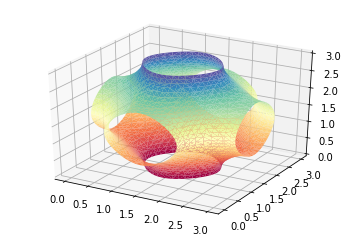

In [16]:
def fun(x, y, z):
    return np.cos(x) + np.cos(y) + np.cos(z)

x, y, z = np.pi*np.mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
vol = fun(x, y, z)
verts, faces = measure.marching_cubes_classic(vol, 0, spacing=(0.1, 0.1, 0.1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
plt.show()

# example 2

In [27]:
mu, sigma = 0, 0.1 
x = 10*np.random.normal(mu, sigma, 5000)
y = 10*np.random.normal(mu, sigma, 5000)    
z = 10*np.random.normal(mu, sigma, 5000)

xyz = np.vstack([x,y,z])
kde = stats.gaussian_kde(xyz)

# Evaluate kde on a grid
xmin, ymin, zmin = x.min(), y.min(), z.min()
xmax, ymax, zmax = x.max(), y.max(), z.max()
xi, yi, zi = np.mgrid[xmin:xmax:30j, ymin:ymax:30j, zmin:zmax:30j]
coords = np.vstack([item.ravel() for item in [xi, yi, zi]]) 
density = kde(coords).reshape(xi.shape)

In [18]:
density.max()

0.061313372733754895

In [19]:
density.min()

9.894859859164204e-33

In [20]:
verts, faces = measure.marching_cubes_classic(density, 0.00001, spacing=(0.1, 0.1, 0.1))

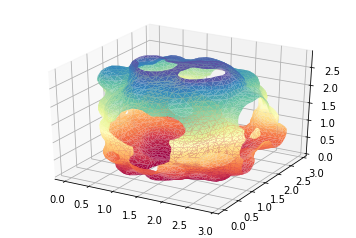

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
plt.show()

# example 3

In [1]:
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff

import numpy as np
from skimage import measure

In [2]:
X,Y,Z = np.mgrid[-2:2:40j, -2:2:40j, -2:2:40j]
surf_eq = X**4 + Y**4 + Z**4 - (X**2+Y**2+Z**2)**2 + 3*(X**2+Y**2+Z**2) - 3   

In [3]:
vertices, simplices = measure.marching_cubes_classic(surf_eq, 0)
x,y,z = zip(*vertices)  

In [4]:
plotly.offline.init_notebook_mode(connected=True)

In [6]:
colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
fig = ff.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=simplices,
                        title="Isosurface")
plotly.offline.iplot(fig)

In [ ]:
mu, sigma = 0, 0.1 
x = 10*np.random.normal(mu, sigma, 5000)
y = 10*np.random.normal(mu, sigma, 5000)    
z = 10*np.random.normal(mu, sigma, 5000)

xyz = np.vstack([x,y,z])
kde = stats.gaussian_kde(xyz)

# Evaluate kde on a grid
xmin, ymin, zmin = x.min(), y.min(), z.min()
xmax, ymax, zmax = x.max(), y.max(), z.max()
xi, yi, zi = np.mgrid[xmin:xmax:30j, ymin:ymax:30j, zmin:zmax:30j]
coords = np.vstack([item.ravel() for item in [xi, yi, zi]]) 
density = kde(coords).reshape(xi.shape)

In [20]:
vertices, simplices = measure.marching_cubes_classic(density, 0.01, spacing=(0.1, 0.1, 0.1))
x,y,z = zip(*vertices)  

In [21]:
colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
fig = ff.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=simplices,
                        title="Isosurface")
plotly.offline.iplot(fig)